In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# 필요한 패키지 설치

import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [4]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [5]:
## 사용할 컬럼을 정리하자.
df2 = pd.get_dummies(df, columns =['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']
                    , drop_first = True)
df2.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,False,True,False,False,False,False,...,True,False,True,False,False,False,True,True,False,True
1,20.34,0.0,0.0,7.0,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
2,26.58,20.0,30.0,8.0,False,True,False,False,False,True,...,True,False,True,True,False,False,False,True,False,False
3,24.21,0.0,0.0,6.0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,23.71,28.0,0.0,8.0,False,False,False,False,True,False,...,False,False,True,False,False,False,True,False,False,False


In [6]:
df2 =df2 * 1

In [7]:
df2

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,7.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,6.0,1,1,0,0,1,1,...,1,0,0,1,0,0,0,1,0,0
319791,29.84,0.0,0.0,5.0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
319792,24.24,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
319793,32.81,0.0,0.0,12.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
# 숫자형 변수 분리

df_num = df[['BMI','PhysicalHealth','MentalHealth','SleepTime']]
df_nom = df2.drop(['BMI','PhysicalHealth','MentalHealth','SleepTime'],axis=1)

In [9]:
#Robust Scaler 적용
RobustScaler = RobustScaler()
df_robust = RobustScaler.fit_transform(df_num) # 스케일링 진행

In [10]:
# 컬럼명 추가

df_num2 = pd.DataFrame(data =df_robust, columns = df_num.columns)

In [11]:
df_num2

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,-1.453315,1.5,10.0,-1.0
1,-0.947226,0.0,0.0,0.0
2,-0.102842,10.0,10.0,0.5
3,-0.423545,0.0,0.0,-0.5
4,-0.491204,14.0,0.0,0.5
...,...,...,...,...
319790,0.009472,3.5,0.0,-0.5
319791,0.338295,0.0,0.0,-1.0
319792,-0.419486,0.0,0.0,-0.5
319793,0.740189,0.0,0.0,2.5


In [12]:
df3 = pd.concat([df_num2, df_nom], axis= 1) # 스케일링한 컬럼을 다시 합치기!

In [13]:
# 독립변수와 종속변수 분리 생성

X = df3.drop(['HeartDisease_Yes'],axis =1 )
y = df3[['HeartDisease_Yes']] # 로지스틱회귀를 사용하기 위해 2진분류로 진행

In [15]:
# train,test 분리
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=111)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((223856, 37), (95939, 37), (223856, 1), (95939, 1))

<Axes: xlabel='HeartDisease_Yes', ylabel='count'>

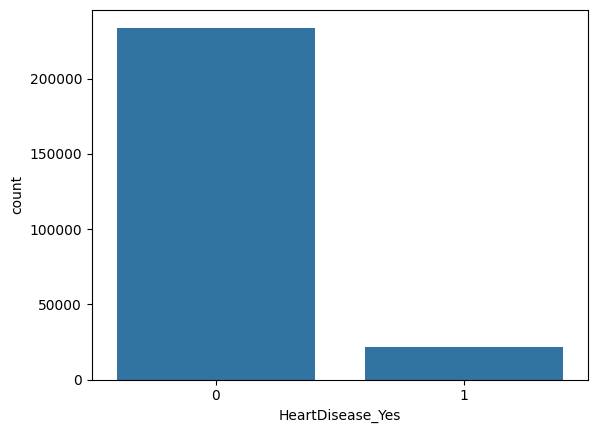

In [19]:
sns.countplot(x='HeartDisease_Yes',data=y_train) # 대부분의 값들이 0의 경우가 많은 케이스

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\administ\Desktop\공부\BDAstudy\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\administ\Desktop\공부\BDAstudy\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
print('train 모델 정확도 : ', model.score(X_train, y_train))
print('test 모델 정확도 : ', model.score(X_test, y_test))

train 모델 정확도 :  0.9159383354961772
test 모델 정확도 :  0.9158992479557216


In [32]:
from sklearn.model_selection import cross_val_score

accuracy_scores = cross_val_score(model,X_train, y_train, scoring = 'accuracy', cv=5)
accuracy_scores2 = cross_val_score(model,X_test, y_test, scoring = 'accuracy', cv=5)

c:\Users\administ\Desktop\공부\BDAstudy\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\administ\Desktop\공부\BDAstudy\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\administ\Desktop\공부\BDAstudy\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

In [33]:
print('평균 검증 정확도 : ',np.mean(accuracy_scores))
print('평균 검증 정확도 : ',np.mean(accuracy_scores2))

평균 검증 정확도 :  0.9158406175413075
평균 검증 정확도 :  0.9162275705014407
